In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import warnings
warnings.filterwarnings('ignore')


air_data = pd.read_csv("Data/final_dataset.csv")
air_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0


In [2]:
#Add 'Delay Sum' column to dataframe & preview
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


air_data['delay_sum'] = air_data[col_list].sum(axis=1)
air_data.head()


,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [3]:
#Group data by air carrier and sum total number of flights for each
airline_groups = air_data.groupby(['carrier_name'])['total_number_flights']
airline_flighttotals = airline_groups.sum()

airline_df_totalflights = airline_flighttotals.reset_index()
airline_df_totalflights

,carrier_name,total_number_flights
0,Alaska Airlines Inc.,283834.0
1,Allegiant Air,108362.0
2,American Airlines Inc.,1007390.0
3,Delta Air Lines Inc.,1052155.0
4,Endeavor Air Inc.,272236.0
5,Envoy Air,347095.0
6,ExpressJet Airlines Inc.,96553.0
7,ExpressJet Airlines LLC,64292.0
8,Frontier Airlines Inc.,137723.0
9,Hawaiian Airlines Inc.,90619.0


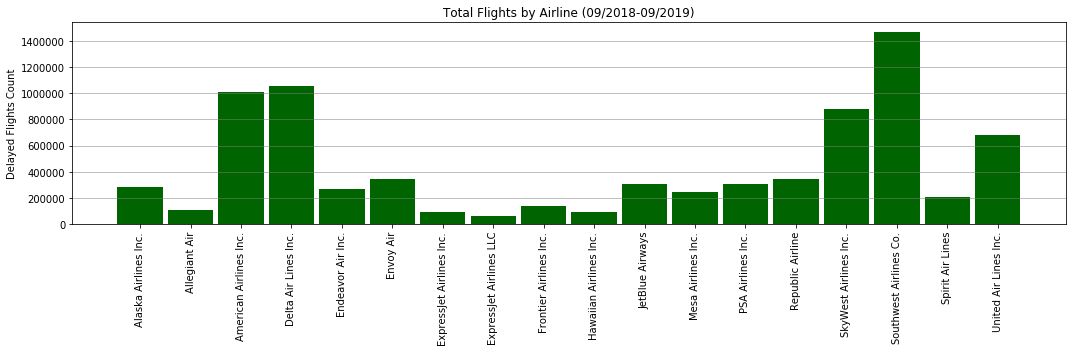

In [4]:
#Bar chart summarizing the total delays by major US airline (top 18)

fig, ax = plt.subplots(figsize=(15,5))

x_axis = airline_df_totalflights["carrier_name"]
y_axis = airline_df_totalflights["total_number_flights"]

plt.bar(x_axis, y_axis,color="darkgreen", align="center", width=.9)
#plt.plot(x_axis, y_axis,'-o',color="orange")
plt.xticks(rotation=90)

ax.yaxis.grid(which="major", color='grey', linestyle='-', linewidth=.5)
ax.set_ylabel('Delayed Flights Count')
ax.set_title('Total Flights by Airline (09/2018-09/2019)')

#Save fig
plt.tight_layout()
plt.savefig("Charts_final/Flights_Tot_Airline.png")

In [5]:
#Create dataframe for sum of delays by airline
airline_delaygroups = air_data.groupby(['carrier_name'])['delay_sum','total_number_flights']

airline_delaytotals = airline_delaygroups.sum()

airline_df_delayflights = airline_delaytotals.reset_index()
airline_df_delayflights["delay_percentage"] = (airline_df_delayflights["delay_sum"]/ airline_df_delayflights['total_number_flights'])*100

airline_df_delayflights.head()

,carrier_name,delay_sum,total_number_flights,delay_percentage
0,Alaska Airlines Inc.,54606.07,283834.0,19.238735
1,Allegiant Air,22592.54,108362.0,20.849135
2,American Airlines Inc.,236426.01,1007390.0,23.469164
3,Delta Air Lines Inc.,152270.24,1052155.0,14.472225
4,Endeavor Air Inc.,53556.07,272236.0,19.672663


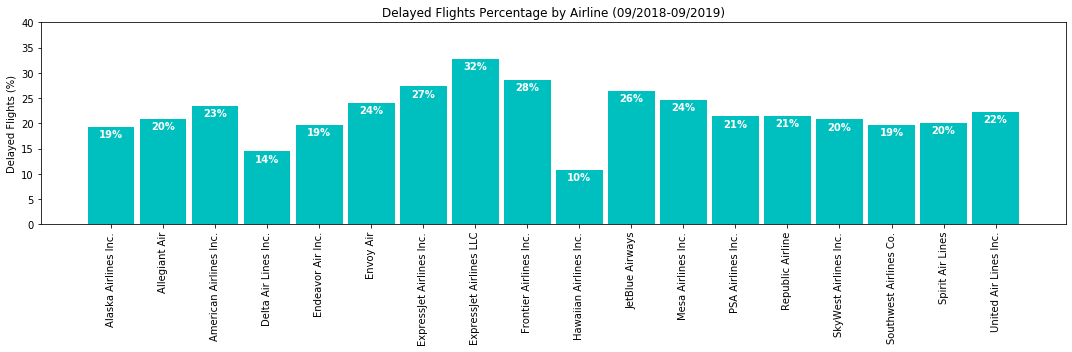

In [6]:
#Summary bar chart of flight delays by airline, presented as a percentage of total flights for each
fig, ax = plt.subplots(figsize=(15,5))

x_axis = airline_df_delayflights["carrier_name"]
y_axis = airline_df_delayflights["delay_percentage"]

bars = ax.bar(x_axis, y_axis, color="c", align="center", width=.9)
#plt.plot(x_axis, y_axis,'-o',color="orange")

plt.xticks(rotation=90)

ax.set_ylabel('Delayed Flights (%)')
ax.set_title('Delayed Flights Percentage by Airline (09/2018-09/2019)')
plt.ylim(0, 40)


def autolabel(bars):
    
    for rect in ax.patches:
        y_value = rect.get_height() 
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.2%}".format(y_value)
        ax.text(x_value, y_value - 1.5, '%d' % int(y_value) + "%", 
                ha='center', va='center', color='white',weight='bold')
# Call function to implement the function calls
autolabel(bars)


#Save fig
plt.tight_layout()
plt.savefig("Charts_final/Delayed_Flights_Perc_Airline.png")

In [7]:
###### Aracely Code ######

# Dataframe of sum of flights by delay type
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]

delay_type = pd.DataFrame(air_data[col_list].sum(axis=0))

delay_type = delay_type.reset_index()
delay_type = delay_type.rename(columns = {'index':'delay_type'})

delay_type

,delay_type,0
0,air_carrier_delay,407869.73
1,weather_delay,51321.87
2,national_aviation_system_delay,479101.11
3,sercurity_delay,2767.63
4,aircraft_arriving_late,539121.24
5,flight_cancelled,144861.00
6,flight_diverted,20535.00


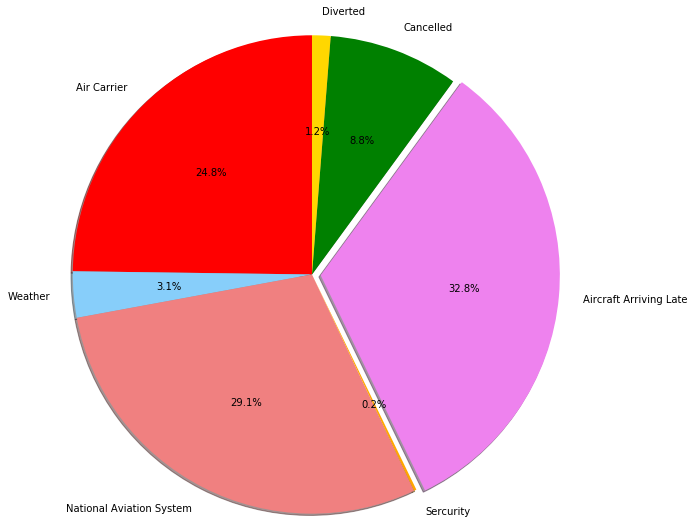

In [24]:
# Create sizes and labels for the pie chart
sizes = delay_type[0]
labels = ["Air Carrier","Weather","National Aviation System","Sercurity","Aircraft Arriving Late","Cancelled",
          "Diverted"]
colors = ["red", "lightskyblue", "lightcoral", "orange", "violet", "g", "gold"]
explode = [0,0,0,0,0.1,0,0]

# Piechart of delay types
plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow = True, 
        radius = 2.75, startangle = 90, pctdistance = 0.6)
plt.tight_layout()

#Save fig
plt.savefig("Charts_final/Type_Delayed_Flights.png",bbox_inches='tight',dpi=100)

In [9]:
# Group by airport name
airport_groups = air_data.groupby(['airport_name'])['delay_sum','total_number_flights']
airport_delays = airport_groups.sum()

airport_df = airport_delays.reset_index()
airport_df.head()

,airport_name,delay_sum,total_number_flights
0,Aberdeen Regional Airport,112.01,808.0
1,Abilene Regional Airport,498.96,2371.0
2,Abraham Lincoln Capital Airport,464.05,1898.0
3,Adak Airport,16.00,113.0
4,Akron-Canton Airport,2054.05,7353.0


In [10]:
sorted_airport_df = airport_df.sort_values('total_number_flights', ascending=False)

Top25_delay_df = sorted_airport_df.nlargest(25, 'total_number_flights')
Top25_delay_df.reset_index(drop=True)
Top25_delay_df["perc_delay"]= Top25_delay_df["delay_sum"]/Top25_delay_df["total_number_flights"]
Top25_delay_df["avg_perc_delay"] = air_data["delay_sum"].sum()/air_data["total_number_flights"].sum()

Top25_delay_df.head()

,airport_name,delay_sum,total_number_flights,perc_delay,avg_perc_delay
15,Atlanta International Airport,65842.93,425255.0,0.154832,0.208236
63,Chicago O'hare International Airport,92928.02,367499.0,0.252866,0.208236
77,Dallas/Fort Worth International Airport,76313.98,319212.0,0.239070,0.208236
84,Denver International Airport,54852.87,265815.0,0.206357,0.208236
57,Charlotte/Douglas International Airport,46262.06,253116.0,0.182770,0.208236


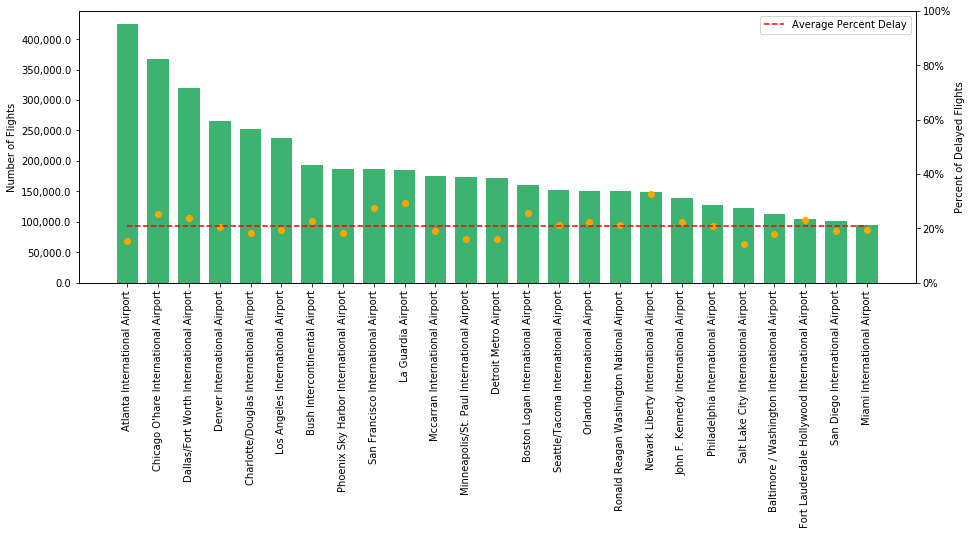

In [11]:
# Create bar chart of the 25 airport with the most flights and plot the percent of delays they had along with thw average

x_axis = Top25_delay_df["airport_name"]
y_axis = Top25_delay_df["total_number_flights"]
y2_axis = Top25_delay_df["perc_delay"]
avg_perc_delay = Top25_delay_df["avg_perc_delay"]

fig = plt.figure(figsize=(15,5))
bar_graph = fig.add_subplot(111)
bar_graph.bar(x_axis, y_axis,color="mediumseagreen", align="center", width=.7)
bar_graph.set_ylabel('Number of Flights')
yvals_bar = bar_graph.get_yticks()
bar_graph.set_yticklabels(['{:,}'.format(x) for x in yvals_bar])

plt.xticks(rotation=90)

line_graph = bar_graph.twinx()
line_graph.plot(x_axis, y2_axis,'-o',color="orange", lw = 0)
line_graph.set_ylabel('Percent of Delayed Flights')
line_graph.set_ylim([0,1])
yvals_line = line_graph.get_yticks()
line_graph.set_yticklabels(['{:,.0%}'.format(x) for x in yvals_line])
line_graph.plot(x_axis, avg_perc_delay,'--',color="red",label='Average Percent Delay')


plt.legend()

#Save fig
plt.savefig("Charts_final/summary_airport_with_most_flights.png",bbox_inches='tight',dpi=100)

In [12]:
###### Luis Code ######

In [13]:
airport_groups = air_data.groupby(['airport_name'])['total_number_flights']
airport_flighttotals = airport_groups.sum()

airport_df_totalflights = airport_flighttotals.reset_index()
airport_df_totalflights.head()

,airport_name,total_number_flights
0,Aberdeen Regional Airport,808.0
1,Abilene Regional Airport,2371.0
2,Abraham Lincoln Capital Airport,1898.0
3,Adak Airport,113.0
4,Akron-Canton Airport,7353.0


In [14]:
sorted_df_top25 = airport_df_totalflights.nlargest(25,'total_number_flights').reset_index()
sorted_df_top25

,index,airport_name,total_number_flights
0,15,Atlanta International Airport,425255.0
1,63,Chicago O'hare International Airport,367499.0
2,77,Dallas/Fort Worth International Airport,319212.0
3,84,Denver International Airport,265815.0
4,57,Charlotte/Douglas International Airport,253116.0
5,185,Los Angeles International Airport,237975.0
6,44,Bush Intercontinental Airport,192696.0
7,247,Phoenix Sky Harbor International Airport,187507.0
8,283,San Francisco International Airport,186577.0
9,169,La Guardia Airport,185731.0


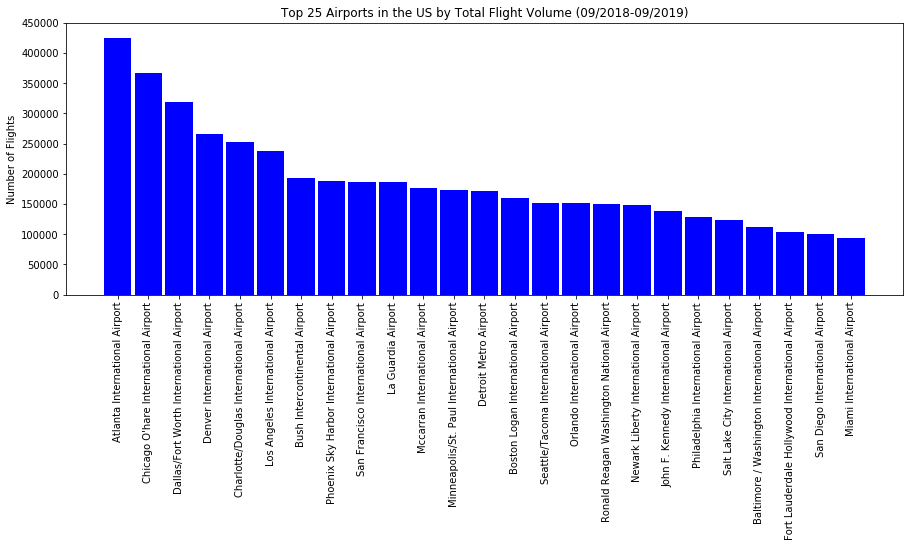

In [15]:
#Bar chart summarizing the total delays by major US airline (top 18)

fig, ax = plt.subplots(figsize=(15,5))

x_axis = sorted_df_top25["airport_name"]
y_axis = sorted_df_top25["total_number_flights"]

plt.bar(x_axis, y_axis,color="b", align="center", width=.9)
#plt.plot(x_axis, y_axis,'-o',color="orange")
plt.xticks(rotation=90)
plt.ylim(0, 450000)

ax.set_ylabel('Number of Flights')
ax.set_title('Top 25 Airports in the US by Total Flight Volume (09/2018-09/2019)')

#Save fig
plt.savefig("Charts_final/Top25_Airports_Volume.png",bbox_inches='tight',dpi=100)

In [16]:
###### Ronak Code ######

#Calculating the delay counts of all types

col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


air_data['delay_sum'] = air_data[col_list].sum(axis=1)
air_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [17]:

#Filtering the data by grouping them by "airport_names" and "delay_sum"

airport_groups = air_data.groupby(['airport_name'])['delay_sum']
airport_delays = airport_groups.sum()

airport_df = airport_delays.reset_index()
airport_df.head()

,airport_name,delay_sum
0,Aberdeen Regional Airport,112.01
1,Abilene Regional Airport,498.96
2,Abraham Lincoln Capital Airport,464.05
3,Adak Airport,16.00
4,Akron-Canton Airport,2054.05


In [18]:
#Sorting the data by filtering out to 'Top 25 airports with most flight delays'

sorted_airport_df = airport_df.sort_values('delay_sum', ascending=False)

Top25_delay_df = sorted_airport_df.nlargest(25, 'delay_sum')
Top25_delay_df.reset_index(drop=True)

,airport_name,delay_sum
0,Chicago O'hare International Airport,92928.02
1,Dallas/Fort Worth International Airport,76313.98
2,Atlanta International Airport,65842.93
3,Denver International Airport,54852.87
4,La Guardia Airport,54431.98
5,San Francisco International Airport,51288.01
6,Newark Liberty International Airport,48368.06
7,Charlotte/Douglas International Airport,46262.06
8,Los Angeles International Airport,46203.03
9,Bush Intercontinental Airport,43761.98


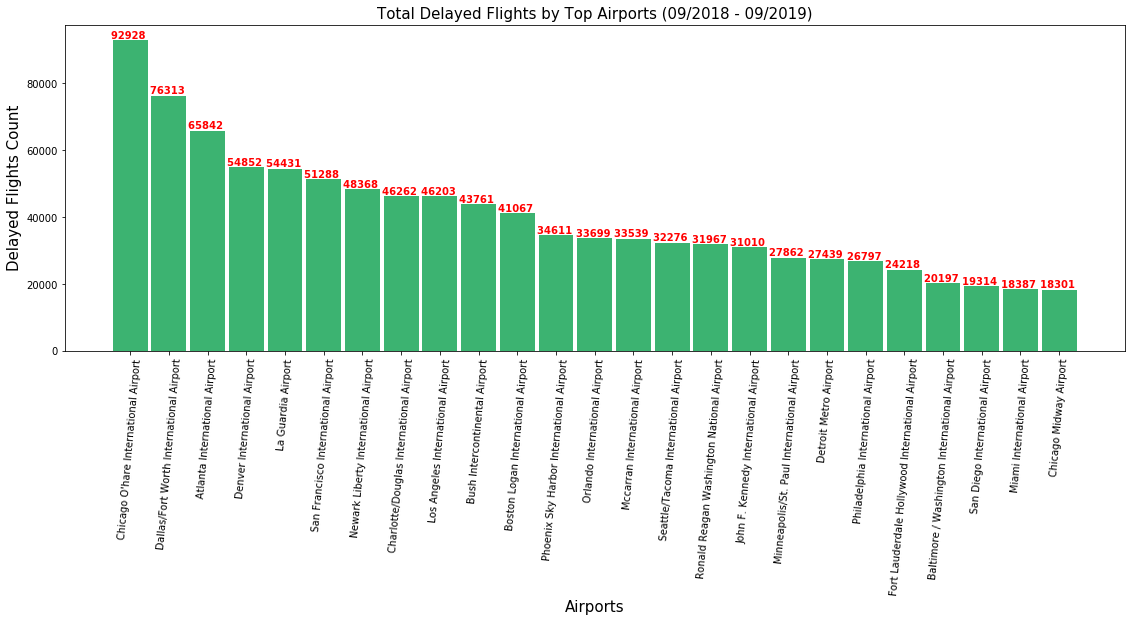

In [19]:
#Bar chart summarizing the total delays by major US airports (Top 25)

fig, ax = plt.subplots(figsize=(19,6))

x_axis = Top25_delay_df["airport_name"]
y_axis = Top25_delay_df["delay_sum"]

plt.bar(x_axis, y_axis,color="mediumseagreen", align="center", width=.9)
plt.xticks(rotation=85)
ax.set_ylabel('Delayed Flights Count', fontsize = 15)
ax.set_title('Total Delayed Flights by Top Airports (09/2018 - 09/2019)', fontsize = 15)
plt.xlabel("Airports", fontsize = 15)

def autolabel(bars):
    
    for rect in ax.patches:
        y_value = rect.get_height() 
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.2%}".format(y_value)
        ax.text(x_value, y_value - 1, '%d' % int(y_value) + " ", 
                ha='center', va='bottom', color='red',weight='bold')
# Call function to implement the function calls
autolabel(plt.bar)

#Save fig
plt.savefig("Charts_final/Total_delays_TopAirports.png",bbox_inches='tight',dpi=100)

In [20]:
#Calling the dataset to create a pie chart

Top25_delay_df.reset_index(drop=True)

Top25_delay_df = Top25_delay_df.rename(columns = {'index':'airport_name'})

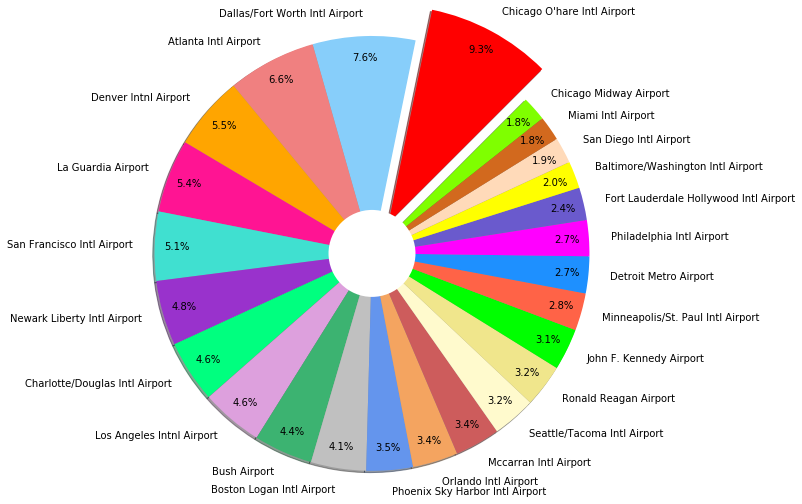

In [22]:
sizes = Top25_delay_df['delay_sum']
labels = ["Chicago O'hare Intl Airport","Dallas/Fort Worth Intl Airport","Atlanta Intl Airport","Denver Intnl Airport","La Guardia Airport","San Francisco Intl Airport","Newark Liberty Intl Airport","Charlotte/Douglas Intl Airport","Los Angeles Intnl Airport","Bush Airport","Boston Logan Intl Airport","Phoenix Sky Harbor Intl Airport","Orlando Intl Airport","Mccarran Intl Airport","Seattle/Tacoma Intl Airport","Ronald Reagan Airport","John F. Kennedy Airport","Minneapolis/St. Paul Intl Airport","Detroit Metro Airport","Philadelphia Intl Airport","Fort Lauderdale Hollywood Intl Airport","Baltimore/Washington Intl Airport","San Diego Intl Airport","Miami Intl Airport","Chicago Midway Airport"]
colors = ["red", "lightskyblue", "lightcoral", "orange", "deeppink", "turquoise", "darkorchid", "springgreen", "plum", "mediumseagreen", "silver", "cornflowerblue", "sandybrown", "indianred", "lemonchiffon", "khaki", "lime", "tomato", "dodgerblue", "magenta", "slateblue", "yellow", "peachpuff", "chocolate", "chartreuse"]
explode = [0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Piechart of delay types
plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow = True,
        radius = 2.50, startangle = 45, pctdistance = 0.9)

#Inside circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


#Save fig
plt.savefig("Charts_final/TopAirport_Delay%_.png",bbox_inches='tight',dpi=100)